In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
import statsmodels.api as sm
print(sm.__version__)

0.14.5


In [2]:
# Load the dataset

data = pd.read_csv('C:/Users/chn03/Desktop/Python lessons/health_project/data/data.csv')
print(data.head())


   id  age sex  height  weight  systolic_bp  cholesterol smoker  disease
0   1   57   F   168.9    65.8        141.8         4.58     No        0
1   2   47   M   180.4    95.9        144.8         5.18    Yes        0
2   3   59   F   169.9    82.2        151.7         6.16     No        0
3   4   72   M   157.7    93.1        151.0         6.63     No        0
4   5   46   M   192.6   104.1        144.1         5.21     No        0


In [3]:
# check for missing values and data types

print(data.isna().sum())
print(data.columns)
print(data.info())
data['disease'] = data['disease'].astype('category')
data['smoker'] = data['smoker'].astype('category')



id             0
age            0
sex            0
height         0
weight         0
systolic_bp    0
cholesterol    0
smoker         0
disease        0
dtype: int64
Index(['id', 'age', 'sex', 'height', 'weight', 'systolic_bp', 'cholesterol',
       'smoker', 'disease'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           800 non-null    int64  
 1   age          800 non-null    int64  
 2   sex          800 non-null    object 
 3   height       800 non-null    float64
 4   weight       800 non-null    float64
 5   systolic_bp  800 non-null    float64
 6   cholesterol  800 non-null    float64
 7   smoker       800 non-null    object 
 8   disease      800 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 56.4+ KB
None


In [4]:
#Descriptive statistics for categorical variables
print(data['disease'].value_counts())
print(data['smoker'].value_counts())
print(data['sex'].value_counts())

disease
0    753
1     47
Name: count, dtype: int64
smoker
No     587
Yes    213
Name: count, dtype: int64
sex
F    403
M    397
Name: count, dtype: int64


In [5]:
# descriptive stats for numerical variables
summary = data[['age', 'systolic_bp', 'height', 'cholesterol', 'weight']].agg(['mean', 'median', 'std', 'min', 'max'])
print(summary)

summary_by_disease = data.groupby('disease')[['age', 'systolic_bp', 'height', 'cholesterol', 'weight']].agg(['mean', 'median', 'std', 'min', 'max'])
print(summary_by_disease)

summary_by_sex = data.groupby('sex')[['age', 'systolic_bp', 'height', 'cholesterol', 'weight']].agg(['mean', 'median', 'std', 'min', 'max'],)
print(summary_by_sex)

              age  systolic_bp      height  cholesterol      weight
mean    49.426250   149.178625  171.849250     4.929150   73.413000
median  50.000000   149.400000  171.350000     4.970000   73.200000
std     14.501118    12.793360    9.804259     0.848413   13.685059
min     18.000000   106.800000  144.400000     2.500000   33.700000
max     90.000000   185.900000  200.400000     7.880000  114.400000
               age                           systolic_bp                    \
              mean median        std min max        mean median        std   
disease                                                                      
0        49.347942   50.0  14.547101  18  90  149.079416  149.3  12.771772   
1        50.680851   51.0  13.831449  18  90  150.768085  151.0  13.172255   

                       ... cholesterol                               \
           min    max  ...        mean median       std   min   max   
disease                ...                                 

C:\Users\chn03\AppData\Local\Temp\ipykernel_20616\2286972618.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_by_disease = data.groupby('disease')[['age', 'systolic_bp', 'height', 'cholesterol', 'weight']].agg(['mean', 'median', 'std', 'min', 'max'])


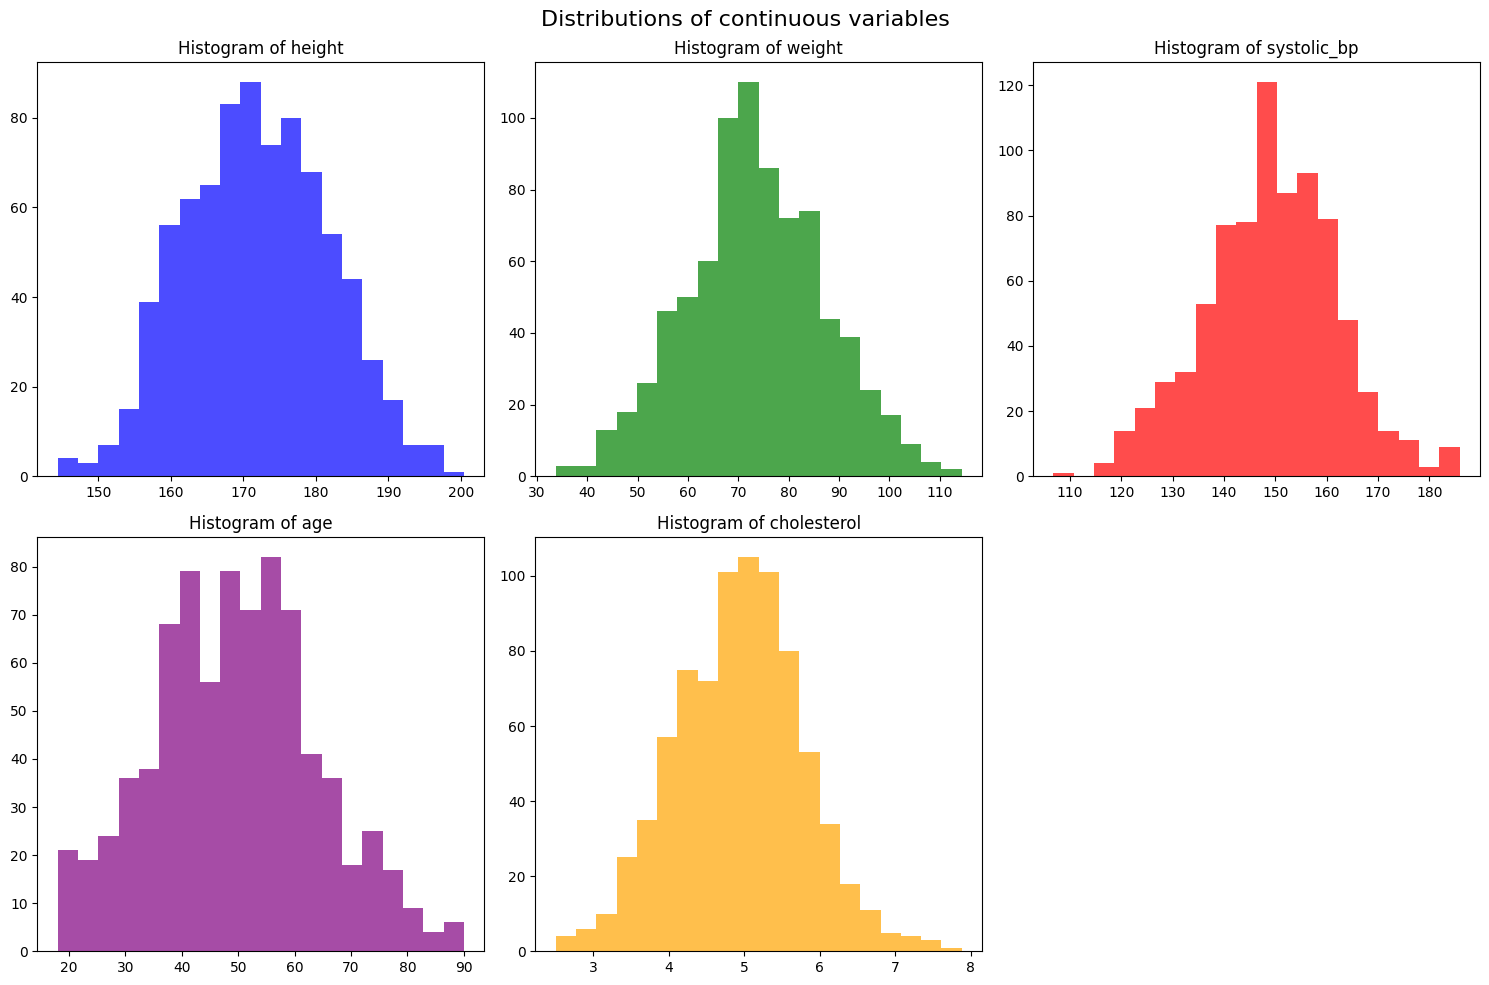

In [6]:
# Data visualisation of continuous variables

fig, axes = plt.subplots(2,3, figsize=(15,10))

axes[0,0].hist(data['height'], bins=20, color='blue', alpha=0.7)
axes[0,0].set_title('Histogram of height')
axes[0,1].hist(data['weight'], bins=20, color='green', alpha=0.7)
axes[0,1].set_title('Histogram of weight')
axes[0,2].hist(data['systolic_bp'], bins=20, color='red', alpha=0.7)
axes[0,2].set_title('Histogram of systolic_bp')
axes[1,0].hist(data['age'], bins=20, color='purple', alpha=0.7)
axes[1,0].set_title('Histogram of age')
axes[1,1].hist(data['cholesterol'], bins=20, color='orange', alpha=0.7)
axes[1,1].set_title('Histogram of cholesterol')
axes[1,2].axis('off') 
fig.suptitle('Distributions of continuous variables', fontsize=16)
plt.tight_layout()

plt.show()

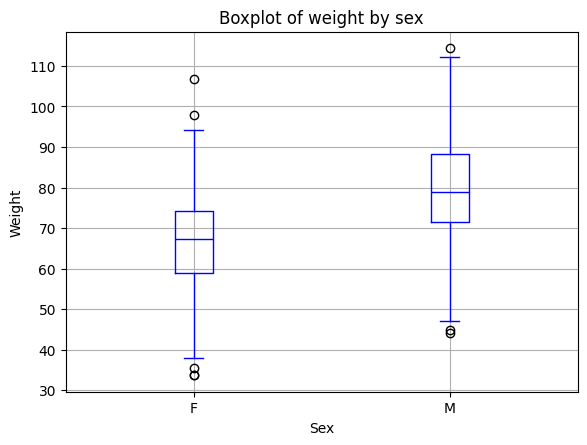

In [7]:
data.boxplot(column='weight', by='sex', color = 'blue', grid=True)
plt.title('Boxplot of weight by sex')
plt.suptitle('')  
plt.xlabel('Sex')
plt.ylabel('Weight')
plt.show()

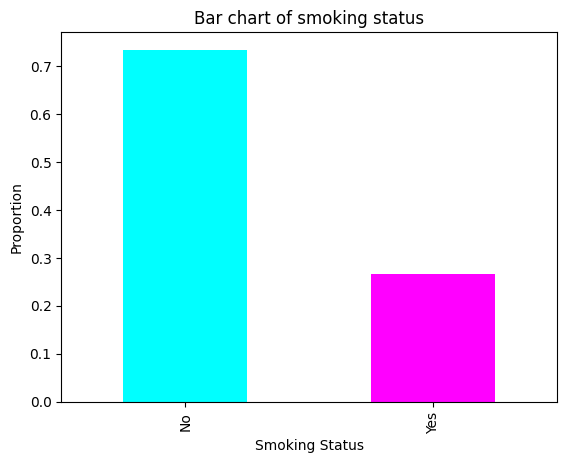

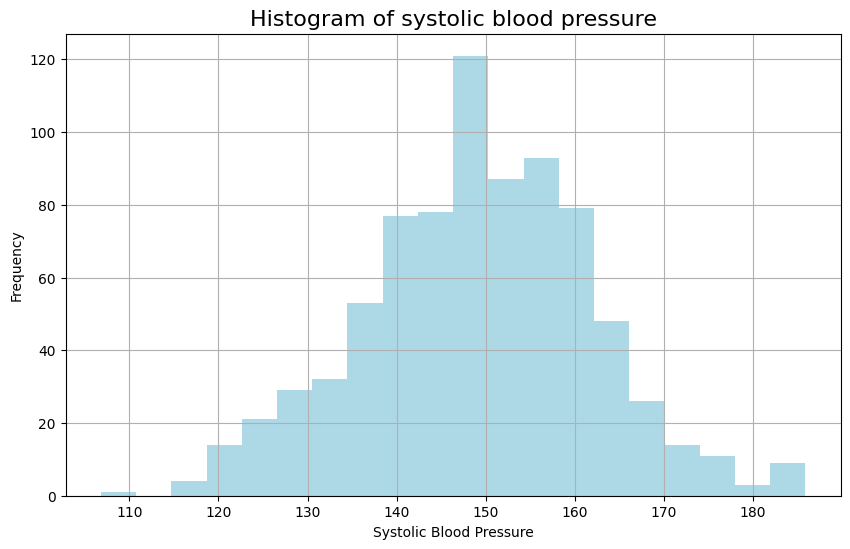

In [8]:
# Descriptive plots of categorical variables 

data['smoker'].value_counts(normalize=True).plot(kind='bar', color=['cyan', 'magenta'])
plt.title('Bar chart of smoking status')  
plt.xlabel('Smoking Status')
plt.ylabel('Proportion')    
plt.show()

data.hist(column='systolic_bp', bins=20, figsize=(10,6), color=['lightblue'])
plt.title('Histogram of systolic blood pressure', fontsize=16) 
plt.suptitle('')  
plt.xlabel('Systolic Blood Pressure')                                  
plt.ylabel('Frequency')
plt.show()

In [9]:
# calculate confidence interval of mean systolic blood pressure using bootstrap
systolic_bp = data['systolic_bp'].values
size = 1000
bootstrap_means = np.empty(size)    
for i in range(size):
    sample = np.random.choice(systolic_bp, size=len(systolic_bp), replace=True)
    bootstrap_means= sample.mean()   
ci_lower = np.percentile(bootstrap_means, 2.5)
ci_upper = np.percentile(bootstrap_means, 97.5)
print(f"95% Confidence interval for mean systolic blood pressure: ({ci_lower}, {ci_upper})")    

95% Confidence interval for mean systolic blood pressure: (149.18474999999998, 149.18474999999998)


In [10]:
# hypothesus test for difference in systolic blood pressure between smokers and non-smokers
print(data['smoker'].value_counts())

smokers_bp = data[data['smoker'] == 'Yes']['systolic_bp']
nonsmokers_bp = data[data['smoker'] == 'No']['systolic_bp']    
t_stat, p_value = stats.ttest_ind(smokers_bp, nonsmokers_bp, equal_var=True)
print(f"T-statistic: {t_stat}, P-value: {p_value}")



smoker
No     587
Yes    213
Name: count, dtype: int64
T-statistic: 0.4609102005307389, P-value: 0.6449886190967198


The p-value of the t-test for the difference in mean systolic blood pressure between smokers and non-smokers is 0.644. There is not enough evidence to suggest a difference in mean systolic blood pressure between smokers and non smokers. 

In [11]:
np.random.seed(237)

boots = 1000
observed_diff = smokers_bp.mean() - nonsmokers_bp.mean()
mean_diffs = np.empty(boots)

for i in range(boots):
    A_star = np.random.choice(smokers_bp, size=len(smokers_bp), replace=True)
    B_star = np.random.choice(nonsmokers_bp, size=len(nonsmokers_bp), replace=True)
    mean_diffs[i] = A_star.mean() - B_star.mean()
p_boot = np.mean(np.abs(mean_diffs) >= abs(observed_diff))


ci_lower = np.percentile(mean_diffs, 2.5)
ci_upper = np.percentile(mean_diffs, 97.5)
print(f"Bootstrap 95% CI: ({ci_lower}, {ci_upper})")
print(f"Bootstrap p-value: {p_boot}")  

Bootstrap 95% CI: (-1.553570994393383, 2.697488602826481)
Bootstrap p-value: 0.7


There is no statistically significant difference in mean systolic blood pressure between smokers and non smokers. 

# Linear regression 
Systolic blood pressure is a consistent predictor of cardiovascular diseases such as heart attack and stroke. A person's age and weight are known drivers of systolic blood pressure. Here, we fit a linear regression model to assess if a persons age and weight predicts their systolic blood pressure. 

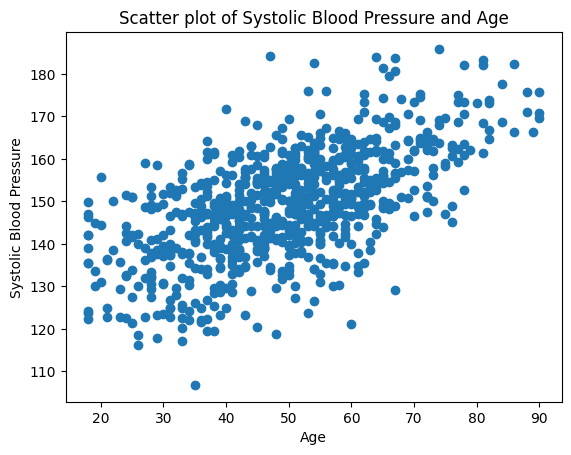

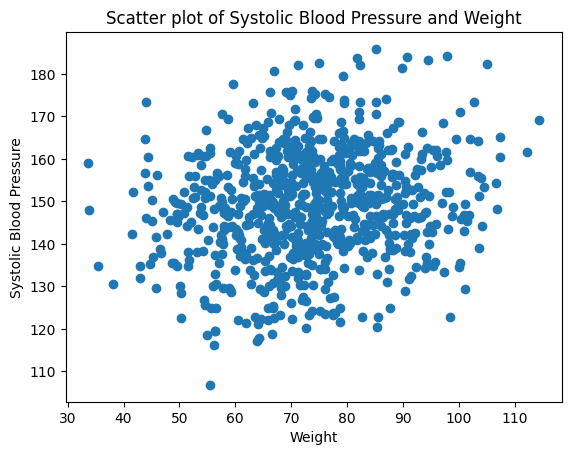

In [15]:
plt.scatter(data['age'], data['systolic_bp'])
plt.title('Scatter plot of Systolic Blood Pressure and Age')
plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure')   

plt.show()

plt.scatter(data['weight'], data['systolic_bp'])
plt.title('Scatter plot of Systolic Blood Pressure and Weight')
plt.xlabel('Weight')    
plt.ylabel('Systolic Blood Pressure')


plt.show() 


Here we observe a more positive linear relationship between age and systolic blood pressure than weight and systolic blood pressure. 

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

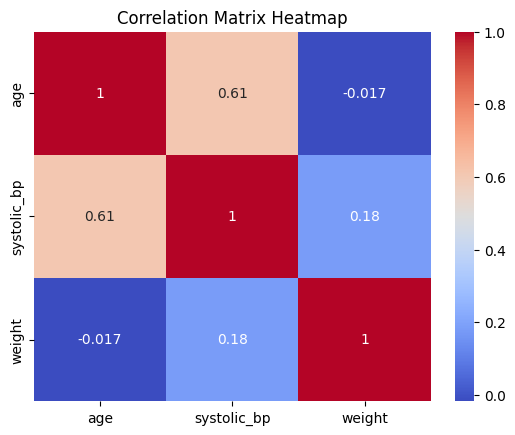

In [19]:
# correlation matrix heatmap of the outcome, predictor and covariates
corr = data[['age', 'systolic_bp', 'weight']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')

In [ ]:
y = data['systolic_bp']
X = data['age']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
result = model.summary2().tables[1] 
print(result) 
print(model.rsquared.round(3))
print(model.pvalues.round(3))


            Coef.  Std.Err.          t         P>|t|      [0.025      0.975]
const  122.684890  1.277646  96.024131  0.000000e+00  120.176945  125.192835
age      0.536026  0.024805  21.609331  6.860490e-82    0.487334    0.584717
0.36915
const    0.0
age      0.0
dtype: float64


Systolic blood pressure of individuals increases by 0.5 with every 1 year increase in age. 

In this model, the variable age accounts for only 37% of the variance in systolic blood pressure. 

NB age is not the only predictor of systolic blood pressure and differences in the distribution of these other variables such as weight, disease status among participants are essential in eplaining the systolic blood pressure of the participants. For example, increase in weight is correlated with increase systolic blood pressure and disease status of an individual could either increase or decrease the blood pressure of an individual. 

It is therefore critical to fit a multiple linear regression to account for these other variable. 

In [40]:
#multi-variable linear regression model
y1 = data['systolic_bp']
X1 = data[['age', 'weight', 'cholesterol']]

X1 = sm.add_constant(X1)    
model1 = sm.OLS(y1, X1).fit()
result1 = model1.summary2().tables[1]
print(result1)
print(model1.rsquared.round(3))
print(model1.pvalues.round(3))

                  Coef.  Std.Err.          t          P>|t|      [0.025  \
const        108.510681  2.535536  42.795949  1.304118e-208  103.533553   
age            0.526411  0.028081  18.746434   3.159541e-65    0.471290   
weight         0.170573  0.026814   6.361459   3.368489e-10    0.117940   
cholesterol    0.431544  0.496455   0.869252   3.849711e-01   -0.542970   

                 0.975]  
const        113.487808  
age            0.581531  
weight         0.223207  
cholesterol    1.406059  
0.406
const          0.000
age            0.000
weight         0.000
cholesterol    0.385
dtype: float64


Holding weight and cholesterol, age significantly predicted systolic pressure.

The r-squared value increase slighly in the multiple linear regression model. Our model explains 40% of the variability in the outcome. 

In [50]:
# second approach using scikit-learn
from sklearn.linear_model import LinearRegression
y1 = data['systolic_bp']
X1 = data[['age', 'weight', 'cholesterol']]

sk_model = LinearRegression()
sk_model.fit(X1, y1)

sk_intercept = float(sk_model.intercept_)
sk_coefficients = float(sk_model.coef_[0])
sk_r_squared = float(sk_model.score(X1, y1))

print(f"""
Scikit-learn Linear Regression Results:
Intercept= {sk_intercept:.3f}
Coefficient for age= {sk_coefficients:.3f}
R-squared = {sk_r_squared:.3f}


""")




Scikit-learn Linear Regression Results:
Intercept= 108.511
Coefficient for age= 0.526
R-squared = 0.406





The results from both approaches are similar and accounts for 40% variability in the outcome. 

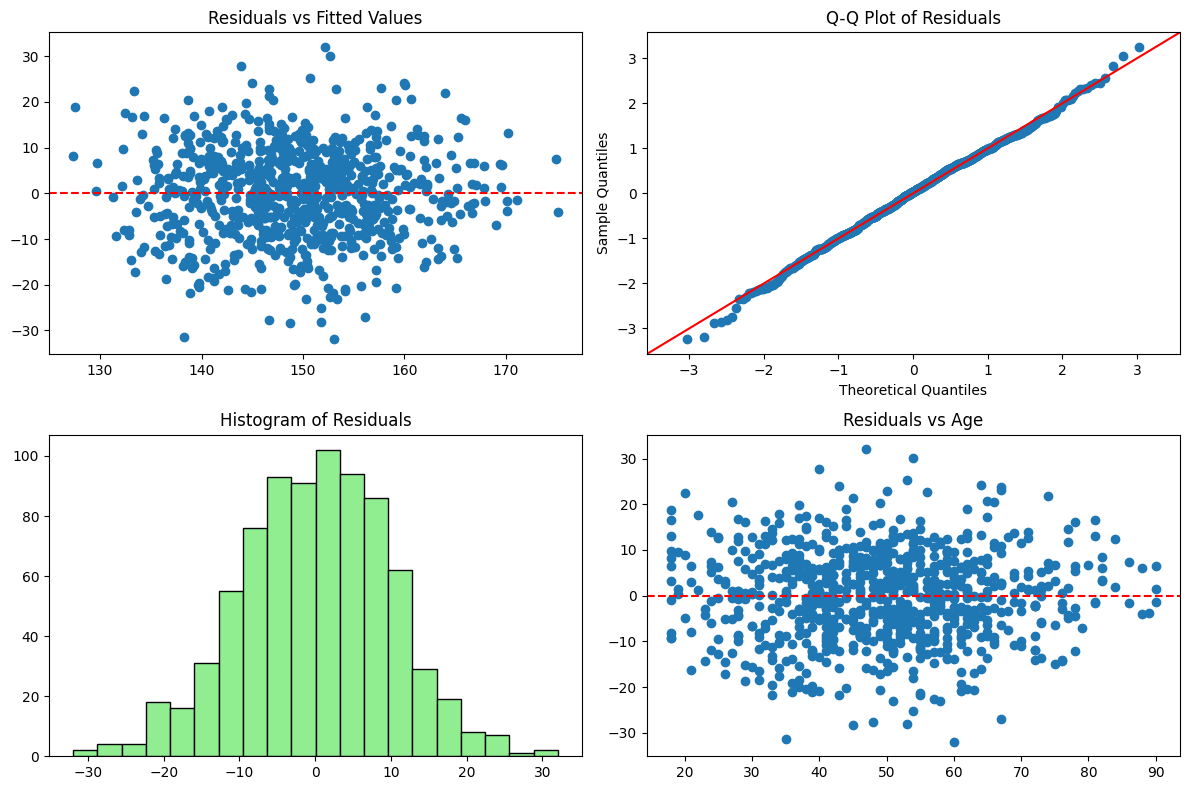

In [53]:
# Verify assumptions of linear regression
prediction = sk_model.predict(X1)
residuals = y1 - prediction


plt.figure(figsize=(12,8))  
plt.subplot(2,2,1)
plt.scatter(model1.fittedvalues, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values') 
plt.subplot(2,2,2)
sm.qqplot(residuals, line='45', fit=True, ax=plt.gca())
plt.title('Q-Q Plot of Residuals')  
plt.subplot(2,2,3)
plt.hist(residuals, bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Residuals')
plt.subplot(2,2,4)
plt.scatter(data['age'], residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Age')
plt.tight_layout()
plt.show()




We can confirm that the residuals of our model are normally distributed and the residuals are randomly scattered around the null line. The above plots confirm that the assumptions of linear regression are met.